# AE simulations
Comparing results of E+ v9.2 to v9.5 where the incident solar angle bug was fixed.

Annual energy and demand data only.

3 vintages, 6 climate zones (NREL's default cities)

In [1]:
# Dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# # 2018 Egrid Costs (elec $/kWh, gas $/therm), change values per city
# gas = 0.83
# elec = 0.1314

---

## Import all csv files

In [3]:
energy92_path = "data/AllEnergy_92.csv"
energy95_path = "data/AllEnergy_95.csv"
demand92_path = "data/AllDemand_92.csv"
demand95_path = "data/AllDemand_95.csv"
energyAll_path = "data/AllEnergy.csv"

In [4]:
energy92 = pd.read_csv(energy92_path)
energy95 = pd.read_csv(energy95_path)
demand92 = pd.read_csv(demand92_path)
demand95 = pd.read_csv(demand95_path)
energyAll = pd.read_csv(energyAll_path)

In [5]:
energy92

,E+Version,Climate,System,Parametric,Heating [kBtu],Cooling [kBtu],Fan [kBtu],Heat [kWh],Cool [kWh],Fan [kWh],U,SHGC,Run
0,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,25220.00,14089.00,3307.00,7389.39,4127.99,968.94000,0.1,0.10,1
1,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23643.00,16177.00,3798.00,6927.51,4739.98,1112.81000,0.1,0.25,2
2,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22708.00,17683.00,4177.00,6653.42,5181.25,1223.82000,0.1,0.40,3
3,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21711.00,19651.00,4656.00,6361.33,5757.74,1364.15000,0.1,0.55,4
4,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20683.00,22213.00,5264.00,6060.18,6508.37,1542.50000,0.1,0.70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,128161.87,1760.92,3516.04,37551.43,515.90,1030.19972,1.1,0.25,32
1292,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,122454.67,2589.41,3630.30,35879.22,758.70,1063.67790,1.1,0.40,33
1293,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117201.25,3608.64,3870.18,34339.97,1057.30,1133.96274,1.1,0.55,34
1294,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112694.09,4638.14,4532.28,33019.37,1359.00,1327.95804,1.1,0.70,35


In [6]:
energy95

,E+Version,Climate,System,Parametric,Heating [kBtu],Cooling [kBtu],Fan [kBtu],Heat [kWh],Cool [kWh],Fan [kWh],U,SHGC,Run
0,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,24971.00,14406.00,3368.00,7316.61,4221.03,986.70000,0.1,0.10,1
1,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23449.00,16518.00,3867.00,6870.68,4839.71,1133.11000,0.1,0.25,2
2,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22264.00,18593.00,4366.00,6523.36,5447.70,1279.16000,0.1,0.40,3
3,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21280.00,20746.00,4889.00,6235.11,6078.66,1432.36000,0.1,0.55,4
4,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20495.00,22843.00,5404.00,6005.09,6692.96,1583.38000,0.1,0.70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,127914.13,1807.05,3518.20,37478.84,529.50,1030.83260,1.1,0.25,32
1292,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,121972.39,2699.13,3649.19,35737.91,790.80,1069.21267,1.1,0.40,33
1293,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117283.16,3593.43,3854.46,34363.97,1052.90,1129.35678,1.1,0.55,34
1294,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112717.21,4630.20,4517.80,33026.14,1356.60,1323.71540,1.1,0.70,35


In [7]:
demand92

,E+Version,Climate,System,Parametric,Heating [kBtuh],Cooling [kBtuh],Fan [kBtuh],Heat [kW],Cool [kW],Fan [kW],U,SHGC,Run
0,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,30.0,0.00,3.00,8.79,0.0,0.91000,0.1,0.10,1
1,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,30.0,0.00,1.00,8.79,0.0,0.42000,0.1,0.25,2
2,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,30.0,0.00,2.00,8.79,0.0,0.47000,0.1,0.40,3
3,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,30.0,0.00,2.00,8.79,0.0,0.52000,0.1,0.55,4
4,9.2,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,30.0,0.00,2.00,8.79,0.0,0.58000,0.1,0.70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,0.0,5.03,1.24,0.00,1.5,0.36332,1.1,0.25,32
1292,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,0.0,5.72,1.45,0.00,1.7,0.42485,1.1,0.40,33
1293,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,0.0,6.23,1.61,0.00,1.8,0.47173,1.1,0.55,34
1294,9.2,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,0.0,7.10,1.87,0.00,2.1,0.54791,1.1,0.70,35


In [8]:
demand95

,E+Version,Climate,System,Parametric,Heating [kBtuh],Cooling [kBtuh],Fan [kBtuh],Heat [kW],Cool [kW],Fan [kW],U,SHGC,Run
0,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,30.0,0.00,3.00,8.79,0.0,0.91000,0.1,0.10,1
1,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,30.0,0.00,1.00,8.79,0.0,0.43000,0.1,0.25,2
2,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,30.0,0.00,2.00,8.79,0.0,0.48000,0.1,0.40,3
3,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,30.0,0.00,2.00,8.79,0.0,0.54000,0.1,0.55,4
4,9.5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,30.0,0.00,2.00,8.79,0.0,0.59000,0.1,0.70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,0.0,5.07,1.23,0.00,1.5,0.36039,1.1,0.25,32
1292,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,0.0,5.79,1.46,0.00,1.7,0.42778,1.1,0.40,33
1293,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,0.0,6.21,1.61,0.00,1.8,0.47173,1.1,0.55,34
1294,9.5,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,0.0,7.08,1.87,0.00,2.1,0.54791,1.1,0.70,35


In [9]:
energyAll

,Climate,System,Parametric,Heating [kBtu]_92,Cooling [kBtu]_92,Fan [kBtu]_92,Heat [kWh]_92,Cool [kWh]_92,Fan [kWh]_92,U,SHGC,Run,Heating [kBtu]_95,Cooling [kBtu]_95,Fan [kBtu]_95,Heat [kWh]_95,Cool [kWh]_95,Fan [kWh]_95
0,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,25220.00,14089.00,3307.00,7389.39,4127.99,968.94000,0.1,0.10,1,24971.00,14406.00,3368.00,7316.61,4221.03,986.70000
1,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23643.00,16177.00,3798.00,6927.51,4739.98,1112.81000,0.1,0.25,2,23449.00,16518.00,3867.00,6870.68,4839.71,1133.11000
2,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22708.00,17683.00,4177.00,6653.42,5181.25,1223.82000,0.1,0.40,3,22264.00,18593.00,4366.00,6523.36,5447.70,1279.16000
3,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21711.00,19651.00,4656.00,6361.33,5757.74,1364.15000,0.1,0.55,4,21280.00,20746.00,4889.00,6235.11,6078.66,1432.36000
4,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20683.00,22213.00,5264.00,6060.18,6508.37,1542.50000,0.1,0.70,5,20495.00,22843.00,5404.00,6005.09,6692.96,1583.38000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,128161.87,1760.92,3516.04,37551.43,515.90,1030.19972,1.1,0.25,32,127914.13,1807.05,3518.20,37478.84,529.50,1030.83260
1292,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,122454.67,2589.41,3630.30,35879.22,758.70,1063.67790,1.1,0.40,33,121972.39,2699.13,3649.19,35737.91,790.80,1069.21267
1293,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117201.25,3608.64,3870.18,34339.97,1057.30,1133.96274,1.1,0.55,34,117283.16,3593.43,3854.46,34363.97,1052.90,1129.35678
1294,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112694.09,4638.14,4532.28,33019.37,1359.00,1327.95804,1.1,0.70,35,112717.21,4630.20,4517.80,33026.14,1356.60,1323.71540


## Find the percent difference from 9.2 to 9.5

In [10]:
energyAll["HeatingPercentDifference"] = ((energyAll['Heating [kBtu]_92'] - energyAll['Heating [kBtu]_95']) / energyAll['Heating [kBtu]_92']) * 100
energyAll["CoolingPercentDifference"] = ((energyAll['Cooling [kBtu]_92'] - energyAll['Cooling [kBtu]_95']) / energyAll['Cooling [kBtu]_92']) * 100
energyAll["FanPercentDifference"] = ((energyAll['Fan [kBtu]_92'] - energyAll['Fan [kBtu]_95']) / energyAll['Fan [kBtu]_92']) * 100

energyAll

,Climate,System,Parametric,Heating [kBtu]_92,Cooling [kBtu]_92,Fan [kBtu]_92,Heat [kWh]_92,Cool [kWh]_92,Fan [kWh]_92,U,...,Run,Heating [kBtu]_95,Cooling [kBtu]_95,Fan [kBtu]_95,Heat [kWh]_95,Cool [kWh]_95,Fan [kWh]_95,HeatingPercentDifference,CoolingPercentDifference,FanPercentDifference
0,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,25220.00,14089.00,3307.00,7389.39,4127.99,968.94000,0.1,...,1,24971.00,14406.00,3368.00,7316.61,4221.03,986.70000,0.987312,-2.249982,-1.844572
1,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23643.00,16177.00,3798.00,6927.51,4739.98,1112.81000,0.1,...,2,23449.00,16518.00,3867.00,6870.68,4839.71,1133.11000,0.820539,-2.107931,-1.816746
2,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22708.00,17683.00,4177.00,6653.42,5181.25,1223.82000,0.1,...,3,22264.00,18593.00,4366.00,6523.36,5447.70,1279.16000,1.955258,-5.146186,-4.524779
3,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21711.00,19651.00,4656.00,6361.33,5757.74,1364.15000,0.1,...,4,21280.00,20746.00,4889.00,6235.11,6078.66,1432.36000,1.985169,-5.572236,-5.004296
4,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20683.00,22213.00,5264.00,6060.18,6508.37,1542.50000,0.1,...,5,20495.00,22843.00,5404.00,6005.09,6692.96,1583.38000,0.908959,-2.836177,-2.659574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,128161.87,1760.92,3516.04,37551.43,515.90,1030.19972,1.1,...,32,127914.13,1807.05,3518.20,37478.84,529.50,1030.83260,0.193302,-2.619653,-0.061433
1292,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,122454.67,2589.41,3630.30,35879.22,758.70,1063.67790,1.1,...,33,121972.39,2699.13,3649.19,35737.91,790.80,1069.21267,0.393844,-4.237259,-0.520343
1293,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117201.25,3608.64,3870.18,34339.97,1057.30,1133.96274,1.1,...,34,117283.16,3593.43,3854.46,34363.97,1052.90,1129.35678,-0.069888,0.421488,0.406183
1294,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112694.09,4638.14,4532.28,33019.37,1359.00,1327.95804,1.1,...,35,112717.21,4630.20,4517.80,33026.14,1356.60,1323.71540,-0.020516,0.171189,0.319486


In [11]:
energyAll_group= energyAll.groupby(["Climate", "System"])

energyAll_group.mean()

Heating [kBtu]_92  Cooling [kBtu]_92  Fan [kBtu]_92  \
Climate System                                                        
2A      Elec         21216.585370       17446.505185    4168.479907   
        Gas          23961.121204       18826.309537    4409.193519   
3A      Elec         39226.743056       13477.516296    3836.124907   
        Gas          45373.194167       14570.649167    4026.291759   
4A      Elec         59528.803611        8388.841852    3536.296204   
        Gas          69494.276111        9199.888889    3683.952130   
5A      Elec         85885.849722        6810.460000    4536.547778   
        Gas         101742.563889        7489.510370    4651.816296   
6A      Elec         96556.567222        4382.406204    4241.005093   
        Gas         114565.004074        4919.988056    4311.706944   
7       Elec        128564.676389        3115.838426    4888.145741   
        Gas         153912.019259        3508.740648    4872.584907   

                Heat [kWh]_92  Cool [kWh]_92  Fan [kWh]_92    U   SHGC   Run  \
Climate System                                                                 
2A      Elec      6216.463704    5111.822037   1221.362159  0.6  0.475  18.5   
        Gas       7020.604907    5516.098148   1291.895988  0.6  0.475  18.5   
3A      Elec     11493.435926    3948.915741   1123.984598  0.6  0.475  18.5   
        Gas      13294.345833    4269.202778   1179.703485  0.6  0.475  18.5   
4A      Elec     17441.939722    2457.932407   1036.134788  0.6  0.475  18.5   
        Gas      20361.822500    2695.572222   1079.397974  0.6  0.475  18.5   
5A      Elec     25164.553796    1995.461111   1329.208499  0.6  0.475  18.5   
        Gas      29810.571389    2194.430556   1362.982175  0.6  0.475  18.5   
6A      Elec     28291.073889    1284.041667   1242.614492  0.6  0.475  18.5   
        Gas      33567.546204    1441.555556   1263.330135  0.6  0.475  18.5   
7       Elec     37669.450000     912.937963   1432.226702  0.6  0.475  18.5   
        Gas      45096.221389    1028.063889   1427.667378  0.6  0.475  18.5   

                Heating [kBtu]_95  Cooling [kBtu]_95  Fan [kBtu]_95  \
Climate System                                                        
2A      Elec         21046.996389       17768.790648    4235.563611   
        Gas          23772.360833       19151.497222    4476.155833   
3A      Elec         38952.098426       13779.255556    3901.434074   
        Gas          45061.717593       14874.305370    4091.843981   
4A      Elec         59108.257500        8621.843056    3598.503981   
        Gas          69279.998981        9398.243426    3734.074537   
5A      Elec         85426.766389        7019.234259    4592.362222   
        Gas         101196.580741        7702.163611    4711.380833   
6A      Elec         96034.931667        4553.744352    4285.364907   
        Gas         113944.791111        5097.621667    4360.857500   
7       Elec        127955.197870        3265.768333    4914.334259   
        Gas         153191.243796        3665.981204    4902.031852   

                Heat [kWh]_95  Cool [kWh]_95  Fan [kWh]_95  \
Climate System                                               
2A      Elec      6166.765556    5206.256019   1241.015481   
        Gas       6965.301204    5611.382037   1311.522131   
3A      Elec     11412.964815    4037.322222   1143.120184   
        Gas      13203.082963    4358.175926   1198.910287   
4A      Elec     17318.719352    2526.196296   1054.361667   
        Gas      20299.039630    2753.686111   1094.083839   
5A      Elec     25030.042870    2056.635185   1345.562131   
        Gas      29650.597870    2256.734259   1380.434584   
6A      Elec     28138.234815    1334.246296   1255.611918   
        Gas      33385.823519    1493.601852   1277.731248   
7       Elec     37490.873241     956.866667   1439.899938   
        Gas      44885.034352    1074.131481   1436.295333   

                HeatingPercentDiffer

## 3A Memphis 

In [12]:
energy_mem1990_elec = energyAll[216:252]

energy_mem2006_elec = energyAll[252:288]

energy_mem2018_elec = energyAll[288:324]

energy_mem1990_gas = energyAll[324:360]

energy_mem2006_gas = energyAll[360:396]

energy_mem2018_gas = energyAll[396:432]

# demand_mem1990_elec = demand92[216:252]

# demand_mem2006_elec = demand92[252:288]

# demand_mem2018_elec = demand92[288:324]

# demand_mem1990_gas = demand92[324:360]

# demand_mem2006_gas = demand92[360:396]

# demand_mem2018_gas = demand92[396:432]

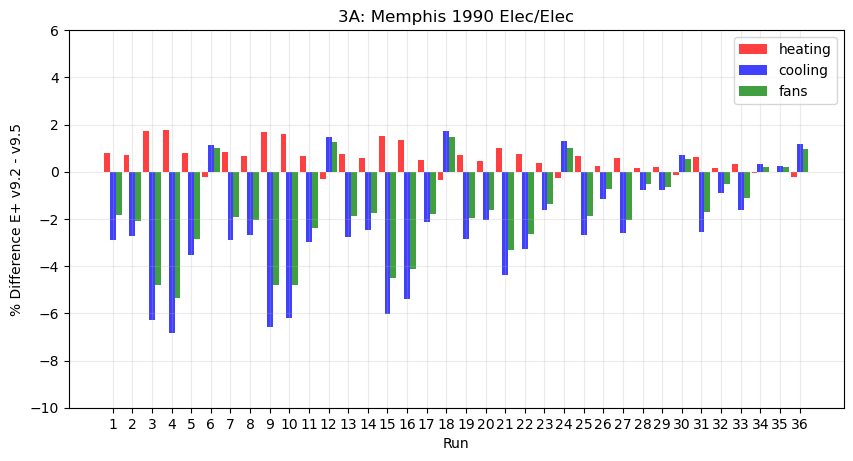

In [13]:
# MEM 1990 elec/elec

x1 = energy_mem1990_elec["Run"]
heating1 = energy_mem1990_elec["HeatingPercentDifference"]
cooling1 = energy_mem1990_elec["CoolingPercentDifference"]
fans1 = energy_mem1990_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x1-w, heating1, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x1, cooling1, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x1+w, fans1, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 1990 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x1)
plt.ylim([-10, 6])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.show()

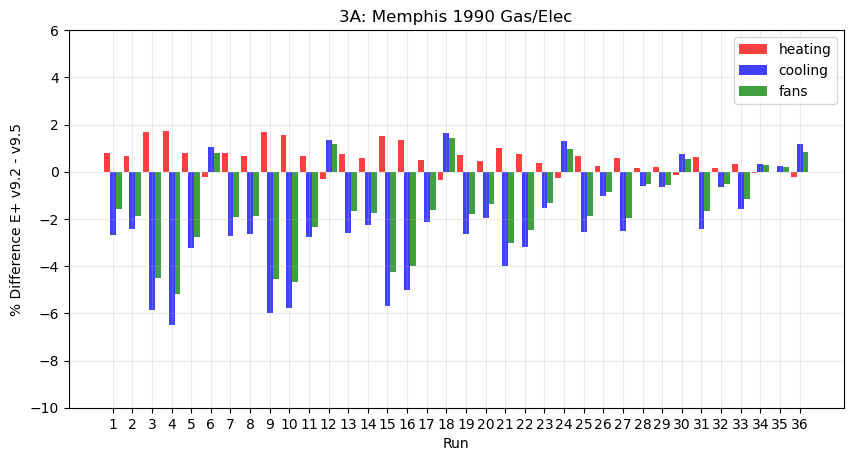

In [14]:
# MEM 1990 gas/elec

x2 = energy_mem1990_gas["Run"]
heating2 = energy_mem1990_gas["HeatingPercentDifference"]
cooling2 = energy_mem1990_gas["CoolingPercentDifference"]
fans2 = energy_mem1990_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x2-w, heating2, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x2, cooling2, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x2+w, fans2, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 1990 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x2)
plt.ylim([-10, 6])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.show()

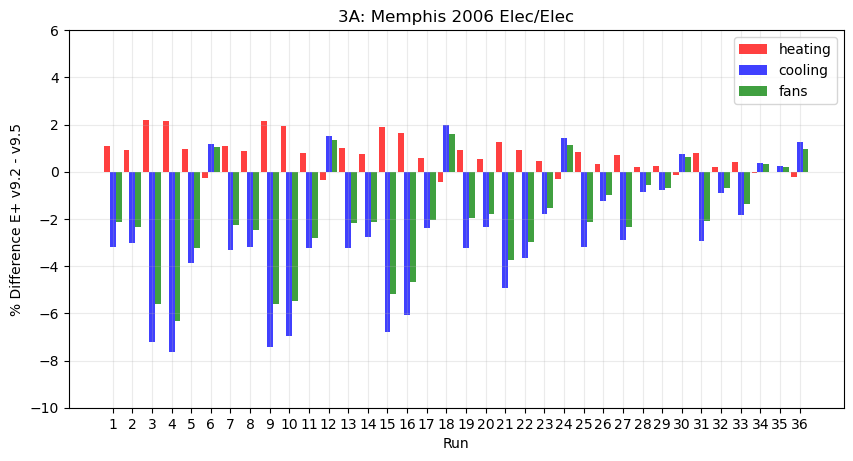

In [15]:
# MEM 2006 elec/elec

x3 = energy_mem2006_elec["Run"]
heating3 = energy_mem2006_elec["HeatingPercentDifference"]
cooling3 = energy_mem2006_elec["CoolingPercentDifference"]
fans3 = energy_mem2006_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x3-w, heating3, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x3, cooling3, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x3+w, fans3, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2006 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x3)
plt.ylim([-10, 6])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.show()

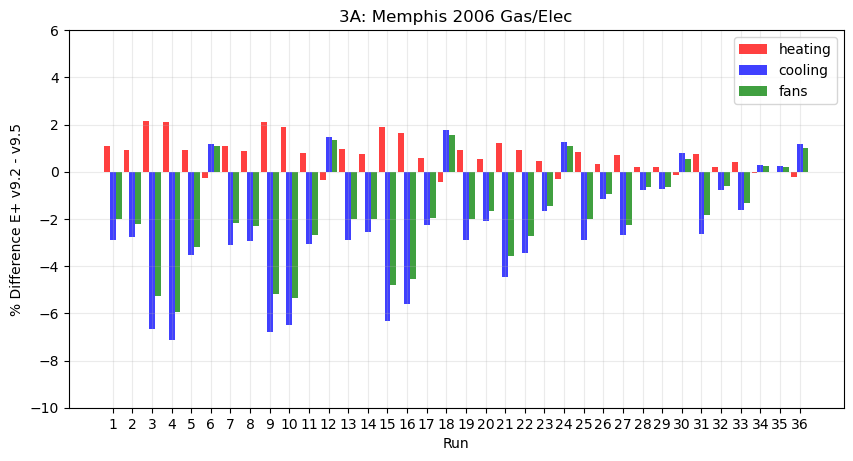

In [16]:
# MEM 2006 gas/elec

x4 = energy_mem2006_gas["Run"]
heating4 = energy_mem2006_gas["HeatingPercentDifference"]
cooling4 = energy_mem2006_gas["CoolingPercentDifference"]
fans4 = energy_mem2006_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x4-w, heating4, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x4, cooling4, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x4+w, fans4, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2006 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x4)
plt.ylim([-10, 6])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.show()

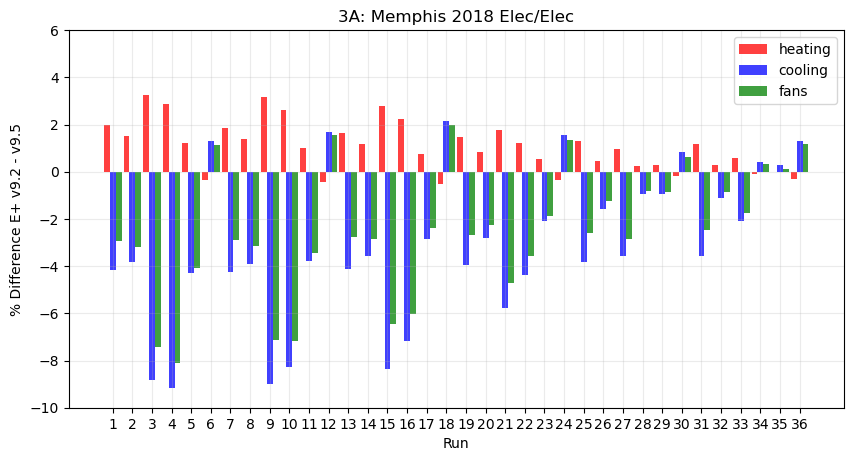

In [17]:
# MEM 2018 elec/elec

x5 = energy_mem2018_elec["Run"]
heating5 = energy_mem2018_elec["HeatingPercentDifference"]
cooling5 = energy_mem2018_elec["CoolingPercentDifference"]
fans5 = energy_mem2018_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x5-w, heating5, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x5, cooling5, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x5+w, fans5, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2018 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x3)
plt.ylim([-10, 6])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.show()

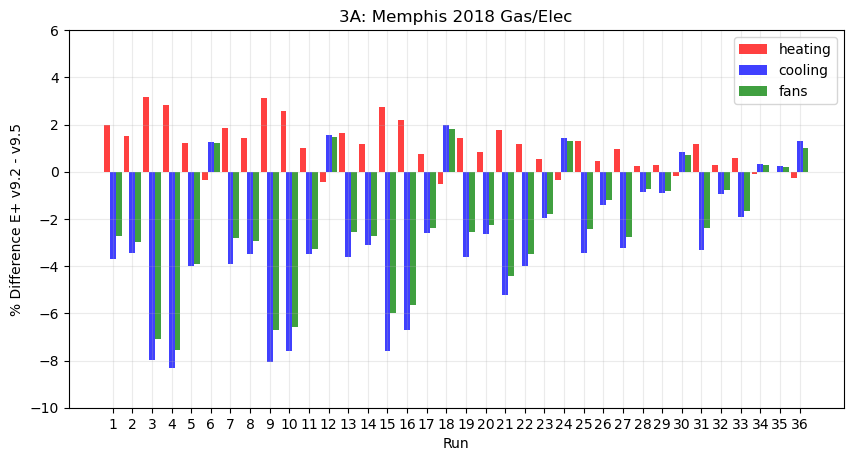

In [18]:
# MEM 2018 gas/elec

x6 = energy_mem2018_gas["Run"]
heating6 = energy_mem2018_gas["HeatingPercentDifference"]
cooling6 = energy_mem2018_gas["CoolingPercentDifference"]
fans6 = energy_mem2018_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x6-w, heating6, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x6, cooling6, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x6+w, fans6, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2018 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x4)
plt.ylim([-10, 6])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.show()